### Deliverable 1: Preprocessing the Data for a Neural Network

In [15]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
url = 'https://raw.githubusercontent.com/lingahoang/Neural_Network_Charity_Analysis/main/CSV%20Resources/charity_data.csv'
application_df = pd.read_csv(url)
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [16]:
# Check 'EIN' value count

application_df.EIN.value_counts()

10520599     1
626274659    1
630475330    1
630416100    1
630357662    1
            ..
383880377    1
383876652    1
383874900    1
383871370    1
996086871    1
Name: EIN, Length: 34299, dtype: int64

In [17]:
# Drop the non-beneficial ID column 'EIN'

application_df = application_df.drop(['EIN'],1)
application_df.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
5,MINORITY ORGAN & TISSUE TRANSPLANT & EDUCATION...,T3,Independent,C1200,Preservation,Trust,1,0,N,5000,1
6,FRIENDS OF ARTS COUNCIL OF GREATER DENHAM SPRI...,T3,Independent,C1000,Preservation,Trust,1,100000-499999,N,31452,1
7,ISRAEL EMERGENCY ALLIANCE,T3,Independent,C2000,Preservation,Trust,1,10M-50M,N,7508025,1
8,ARAMCO BRATS INC,T7,Independent,C1000,ProductDev,Trust,1,1-9999,N,94389,1
9,INTERNATIONAL ASSOCIATION OF FIRE FIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0


In [18]:
# Determine the number of unique values in each column.

application_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [19]:
# Look at 'NAME' value counts 

application_df.NAME.value_counts()

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

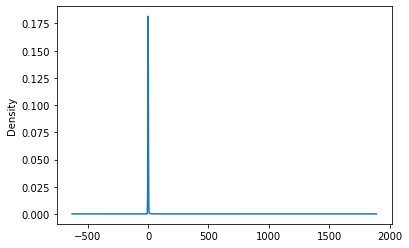

In [20]:
# Visualize the value counts of APPLICATION_TYPE

name_counts = application_df.NAME.value_counts()
name_counts.plot.density()

In [21]:
# Determine which values to replace if counts are less than ...?

replace_name = list(name_counts[name_counts < 2].index)

# Replace in dataframe
for name in replace_name:
    application_df.NAME = application_df.NAME.replace(name,"Other")
    
# Check to make sure binning was successful
application_df.NAME.value_counts()

Other                                                                 18776
PARENT BOOSTER USA INC                                                 1260
TOPS CLUB INC                                                           765
UNITED STATES BOWLING CONGRESS INC                                      700
WASHINGTON STATE UNIVERSITY                                             492
                                                                      ...  
WASHINGTON EXPLORER SEARCH AND RESCUE                                     2
INTERNATIONAL ALLIANCE THEATRICAL STAGE EMPLOYEES & MOVING PICTURE        2
BIRTH NETWORK                                                             2
NATIONAL ASSOCIATON OF CORPORATE DIRECTORS                                2
NATIONAL SOCIETY COLONIAL DAMES XVII CENTURY                              2
Name: NAME, Length: 793, dtype: int64

In [24]:
# Look at SPECIAL CONSIDERATIONS value counts for binning

special_consideration_counts = application_df.SPECIAL_CONSIDERATIONS.value_counts()
special_consideration_counts

N    34272
Y       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64

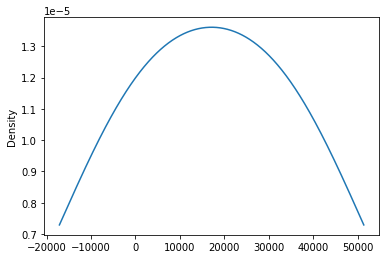

In [26]:
# Visualize the value counts of CLASSIFICATION

special_consideration_counts.plot.density()


In [27]:
# # Determine which values to replace if counts are less than ..?

# replace_class = list(special_consideration_counts[special_consideration_counts < 1800].index)

# # Replace in dataframe
# for cls in replace_class:
#     application_df.SPECIAL_CONSIDERATIONS = application_df.SPECIAL_CONSIDERATIONS.replace(cls,"Other")
    
# # Check to make sure binning was successful
# application_df.SPECIAL_CONSIDERATIONS.value_counts()

N        34272
Other       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64

In [28]:
# Look at INCOME_AMT value counts for binning
income_amt_counts = application_df.INCOME_AMT.value_counts()
income_amt_counts

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

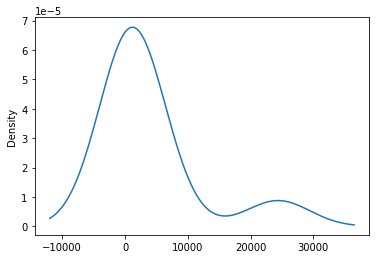

In [29]:
# Visualize the value counts of INCOME_AMT
income_amt_counts.plot.density()

In [30]:
# Determine which values to replace if counts are less than ..?
replace_class = list(income_amt_counts[income_amt_counts < 500].index)

# Replace in dataframe
for cls in replace_class:
    application_df.INCOME_AMT = application_df.INCOME_AMT.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.INCOME_AMT.value_counts()

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
Other              564
10000-24999        543
Name: INCOME_AMT, dtype: int64

In [31]:
# Look at APPLICATION_TYPE value counts for binning
application_type_counts = application_df.APPLICATION_TYPE.value_counts()
application_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

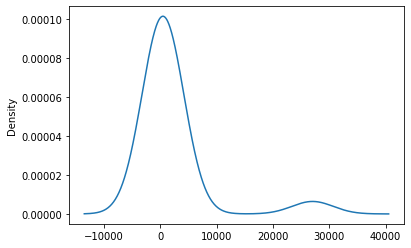

In [32]:
# Visualize the value counts of APPLICATION_TYPE
application_type_counts.plot.density()

In [33]:
# Determine which values to replace if counts are less than ..?
replace_class = list(application_type_counts[application_type_counts < 100].index)

# Replace in dataframe
for cls in replace_class:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
Other      120
Name: APPLICATION_TYPE, dtype: int64

In [34]:
# Look at ASK_AMT value counts for binning
ask_amt_counts = application_df.ASK_AMT.value_counts()
ask_amt_counts

5000        25398
10478           3
15583           3
63981           3
6725            3
            ...  
5371754         1
30060           1
43091152        1
18683           1
36500179        1
Name: ASK_AMT, Length: 8747, dtype: int64

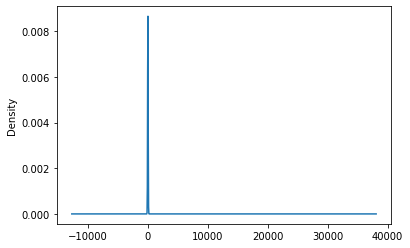

In [35]:
# Visualize the value counts of ASK_AMT
ask_amt_counts.plot.density()

In [ ]:
# # Determine which values to replace if counts are less than ..?
# replace_class = list(ask_amt_counts[ask_amt_counts < 1].index)

# # Replace in dataframe
# for cls in replace_class:
#     application_df.ASK_AMT = application_df.ASK_AMT.replace(cls,"Other")
    
# # Check to make sure binning was successful
# application_df.ASK_AMT.value_counts()

In [36]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['NAME',
 'APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [37]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,NAME_4-H CLUBS & AFFILIATED 4-H ORGANIZATIONS,NAME_AACE INTERNATIONAL,NAME_ACADEMY OF GENERAL DENTISTRY,NAME_ACADEMY OF MANAGED CARE PHARMACY,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_ACTIVE 20-30 UNITED STATES AND CANADA,NAME_ACTS MINISTRY,NAME_ACTS MISSIONS,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AGENTS ASSOCIATION,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_Other,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Other
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [38]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_4-H CLUBS & AFFILIATED 4-H ORGANIZATIONS,NAME_AACE INTERNATIONAL,NAME_ACADEMY OF GENERAL DENTISTRY,NAME_ACADEMY OF MANAGED CARE PHARMACY,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_ACTIVE 20-30 UNITED STATES AND CANADA,NAME_ACTS MINISTRY,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_Other,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Other
0,1,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [39]:
# Split our preprocessed data into our features and target arrays
X = application_df.drop('IS_SUCCESSFUL',1).values

y = application_df['IS_SUCCESSFUL'].values

# Split the preprocessed data into a training and testing dataset
X_train,X_test,y_train,y_test = train_test_split(X, 
                                                 y, 
                                                 random_state=42,
                                                 stratify=y
                                                )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [40]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Compile, Train and Evaluate the Model

In [42]:
from tensorflow.keras.layers import Dense

In [43]:
# Define the model - deep neural net, i.e., the number of input features and 
# hidden nodes for each layer.

number_input_features = len(X_train[0])
hidden_nodes_layer1 = 400
hidden_nodes_layer2 = 250
# hidden_nodes_layer3 = 200
# hidden_nodes_layer4 = 20
# hidden_nodes_layer5 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(Dense(
    units=hidden_nodes_layer1,
    input_dim=number_input_features,
    activation='relu')
      )

# Second hidden layer
nn.add(Dense(
    units=hidden_nodes_layer2,
    activation='relu')
      )

# Output layer
nn.add(Dense(
    units=1,
    activation='sigmoid')
      )

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 400)               360400    
                                                                 
 dense_1 (Dense)             (None, 250)               100250    
                                                                 
 dense_2 (Dense)             (None, 1)                 251       
                                                                 
Total params: 460,901
Trainable params: 460,901
Non-trainable params: 0
_________________________________________________________________


In [44]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("optimized_checkpoints/",exist_ok=True)
checkpoint_path = "optimized_checkpoints/weights.{epoch:02d}.hdf5"

In [45]:
# Compile the model
nn.compile(loss='binary_crossentropy',
           optimizer='adam',
           metrics=['accuracy']
          )

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath = checkpoint_path,
    verbose = 1,
    save_weights_only = True,
    save_freq = 5
)

In [46]:
# Train the model
# fit_model = nn.fit(X_train_scaled,y_train,epochs=100)
fit_model = nn.fit(X_train_scaled, y_train, epochs=10, callbacks=[cp_callback])


Epoch 1/10
  1/804 [..............................] - ETA: 8:08 - loss: 0.8469 - accuracy: 0.6562
Epoch 1: saving model to optimized_checkpoints/weights.01.hdf5

Epoch 1: saving model to optimized_checkpoints/weights.01.hdf5
 10/804 [..............................] - ETA: 5s - loss: 0.7032 - accuracy: 0.6250  
Epoch 1: saving model to optimized_checkpoints/weights.01.hdf5

Epoch 1: saving model to optimized_checkpoints/weights.01.hdf5
 20/804 [..............................] - ETA: 4s - loss: 0.6762 - accuracy: 0.6703
Epoch 1: saving model to optimized_checkpoints/weights.01.hdf5

Epoch 1: saving model to optimized_checkpoints/weights.01.hdf5
 30/804 [>.............................] - ETA: 4s - loss: 0.6595 - accuracy: 0.6854
Epoch 1: saving model to optimized_checkpoints/weights.01.hdf5

Epoch 1: saving model to optimized_checkpoints/weights.01.hdf5
 40/804 [>.............................] - ETA: 4s - loss: 0.6515 - accuracy: 0.6930
Epoch 1: saving model to optimized_checkpoints/weigh

In [47]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.4622 - accuracy: 0.7978 - 609ms/epoch - 2ms/step
Loss: 0.46217066049575806, Accuracy: 0.7977842688560486


In [48]:
# Export our model to HDF5 file
nn.save('AlphabetSoupCharityOptimized.h5')